In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# COMP809 - Lab 5

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/framingham.csv");
df = df.dropna(); # eliminate
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
# Creating a data frame with the continuous variables
X      = df.drop(["male","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes","TenYearCHD"], axis = 1);
# Note that we are including education, which is categorical ordinal, as numerical to incoorprate its information.
# Standardising
scaler = StandardScaler(); # creating object
fitted = scaler.fit(X);
X_std  = pd.DataFrame(fitted.transform(X));
print(X_std)

             0         1         2         3         4         5         6  \
0    -1.233351  1.975752 -0.757068 -0.949714 -1.193695 -1.078415  0.291688   
1    -0.415591  0.019795 -0.757068  0.297729 -0.514637 -0.159695  0.724614   
2    -0.181945 -0.958183  0.921174  0.184325 -0.220378 -0.243215 -0.109261   
3     1.336754  0.997773  1.760294 -0.269291  0.798209  1.009584  0.687717   
4    -0.415591  0.997773  1.172910  1.091556 -0.107202  0.090864 -0.660258   
...        ...       ...       ...       ...       ...       ...       ...   
3651  0.986285  0.997773 -0.757068 -1.131161  0.390774 -0.159695 -0.202734   
3652  2.154514 -0.958183 -0.757068 -1.380649  1.613079  1.176624 -0.650419   
3653  0.051701 -0.958183 -0.673156  1.726618  2.111055  0.759024  0.045707   
3654  0.168524  0.997773  2.851151 -0.677545 -0.265649 -0.243215 -1.494133   
3655  0.285347  0.019795 -0.757068  0.728664  0.051245  0.007345 -1.061207   

             7         8  
0     0.356340 -0.203127  
1     1.6

## Question 1

### Question 1 (a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

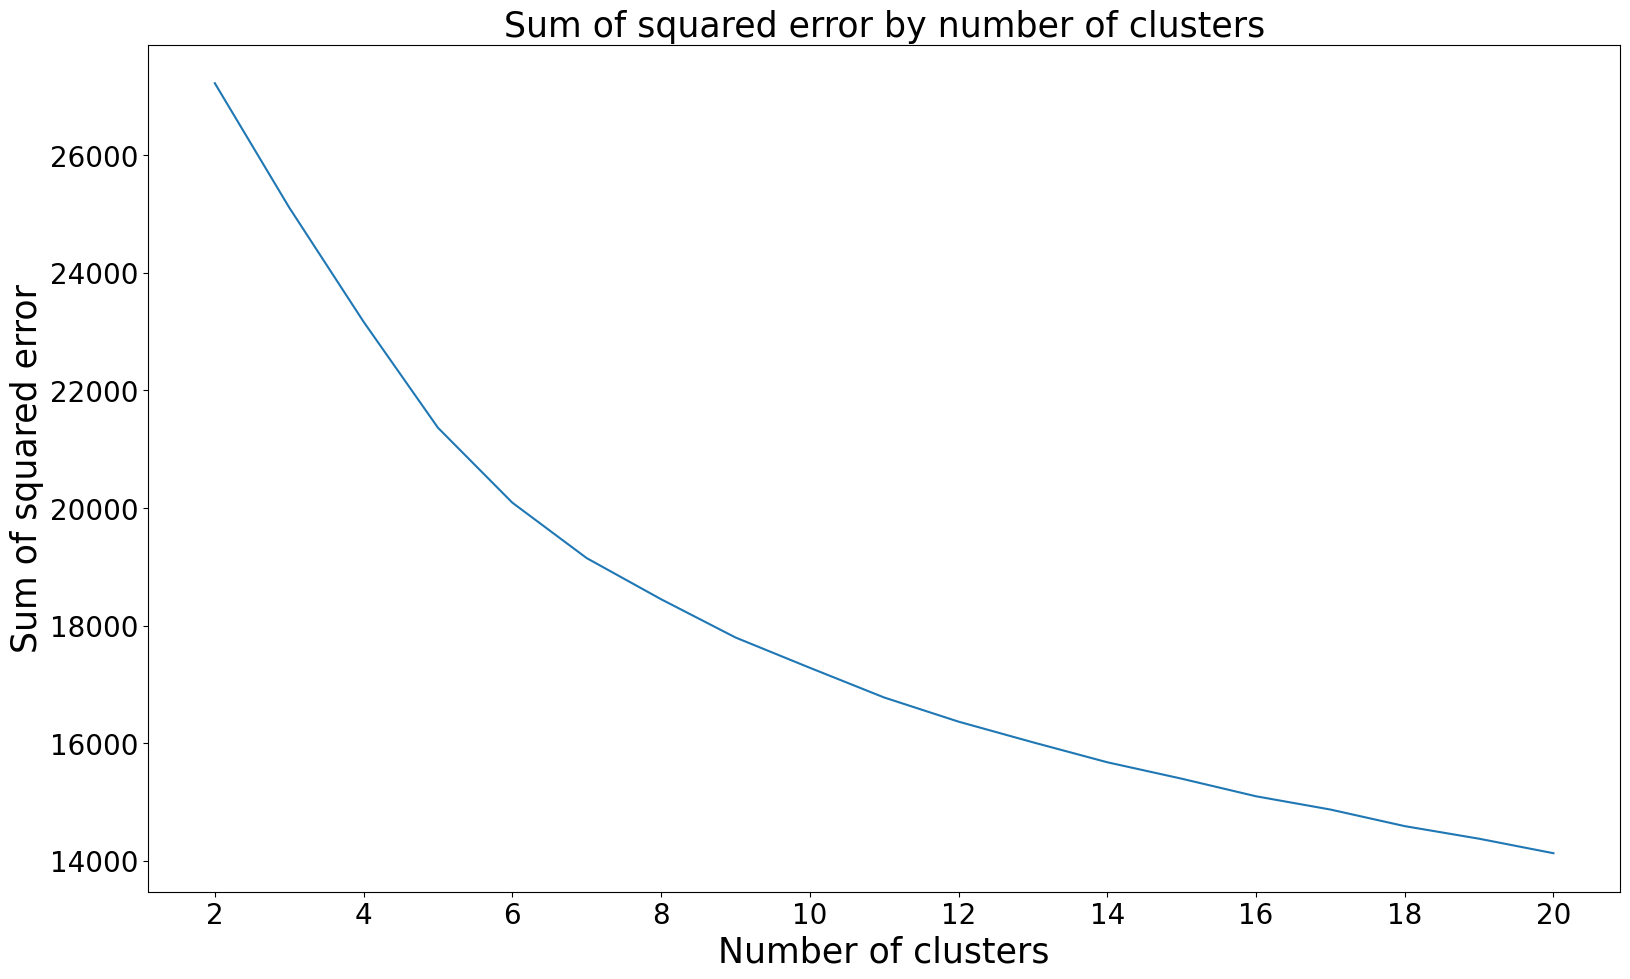

In [9]:
def wcss(x, kmax):
    wcss_s = []
    for k in range(2, kmax + 1):
        kmeans = KMeans(n_clusters = k);
        kmeans.fit(x);
        wcss_s.append(kmeans.inertia_);# distances of samples to closest cluster center
    return wcss_s
# Plot
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
kmax = 20; # maximum number of clusters
ax.plot(range(2, kmax + 1), wcss(X_std, kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Sum of squared error", fontsize = 25);
ax.set_title("Sum of squared error by number of clusters", fontsize = 25);
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # to force intergers in x-axis
plt.show();

# It is not clear where the elbow effect happens, but it could be at K=5, 6, or 7 since the SSE decreased
# quite significantly with respect to lower K values.

# For K values greater than 7, the SSE decreases, but not as dramatically.


### Question 1 (b)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

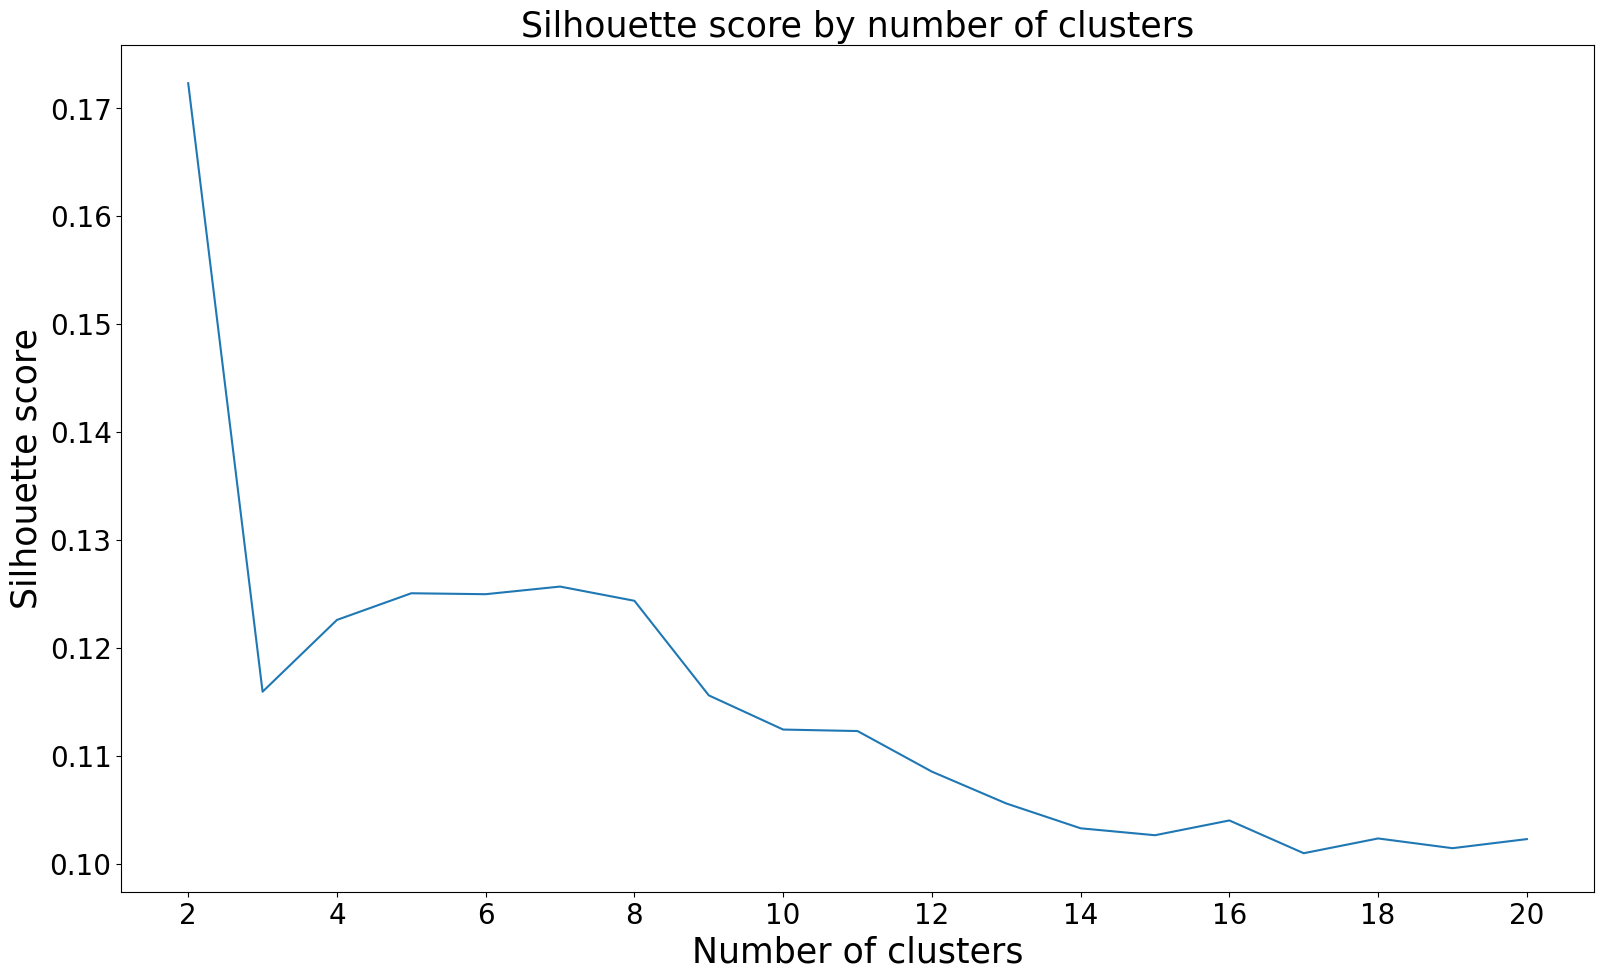

In [10]:
def Silhouette(x, kmax):
    sil = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(x)
        sil.append(silhouette_score(x, kmeans.labels_, metric = "euclidean"))
    return sil
# Plot
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
ax.plot(range(2,kmax+1) , Silhouette(X_std,kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Silhouette score", fontsize = 25);
ax.set_title("Silhouette score by number of clusters", fontsize = 25);
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # to force intergers in x-axis
plt.show();

# The Silhouette score reaches its maximum value at K=2, followed by K=3 and 4.
# So, this method criteria favours these K-values.  The score decreases dramatically for
# higher K values.

### Question 1 (c)

In [11]:
# The Silhouette scores favours K= 2, 7, 5 and 6, but the SSEs for K=2 is too high in
# comparasion to that one for K=7, 5 or 6.

# Therefore, we propose K=7.
# It could also be argued K= 5 and 6.

### Question 1 (d)

Variability explained by first 2 PCs:  0.4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


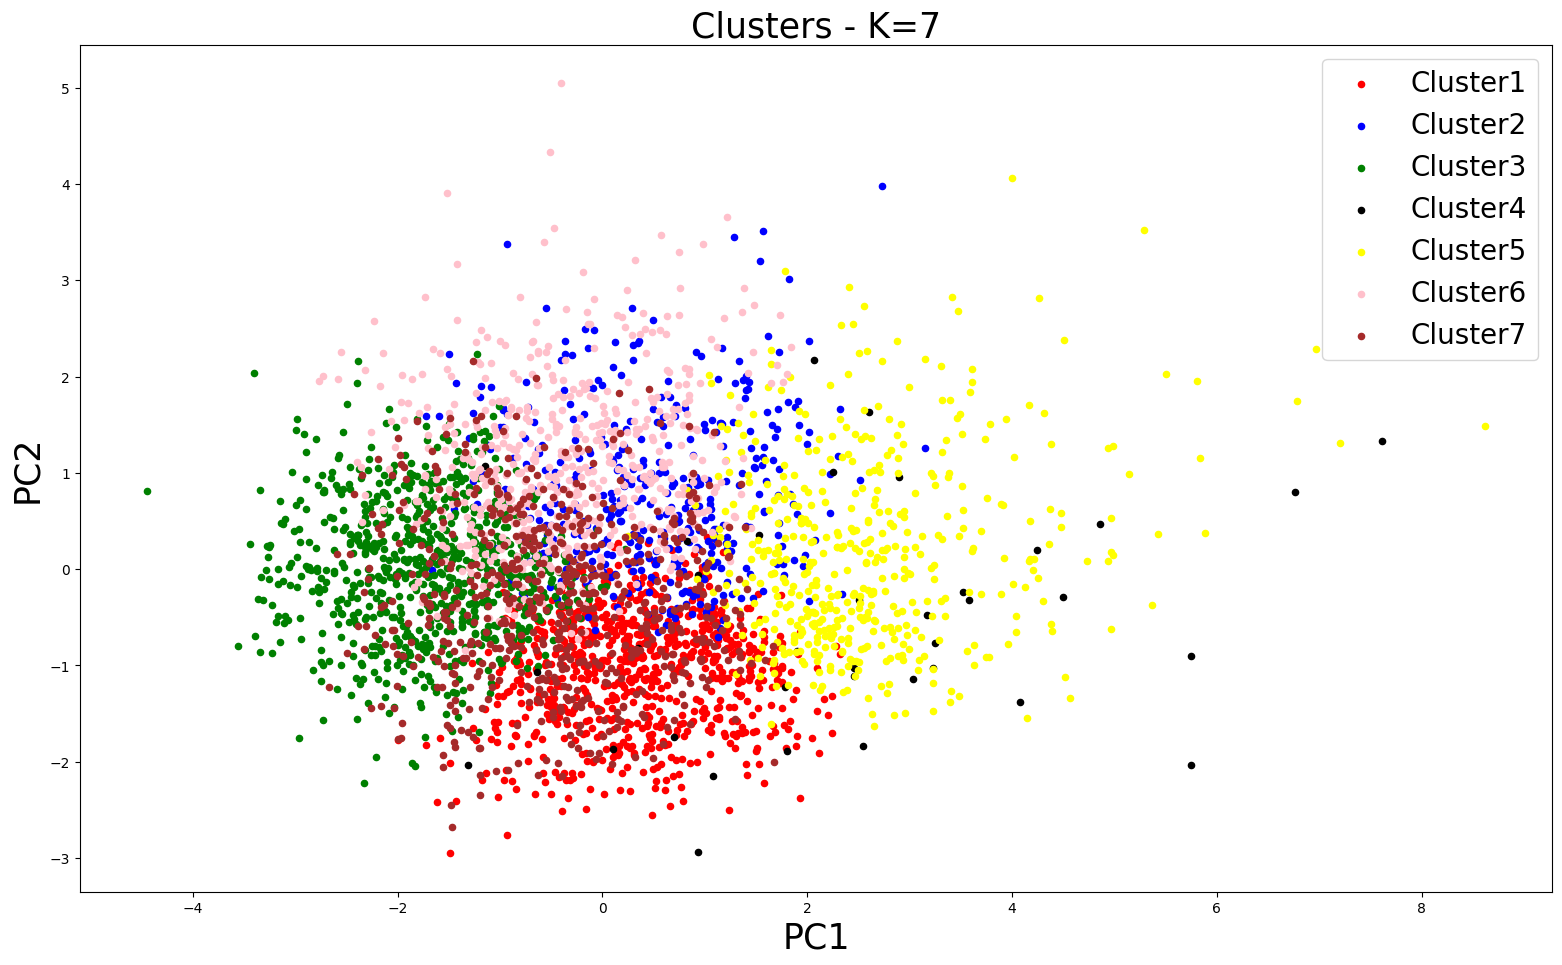

In [12]:
pca = PCA(n_components=2);
principalComponents = pca.fit_transform(X_std);
print("Variability explained by first 2 PCs: ", round(np.sum(pca.explained_variance_ratio_),2))
PCs = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"]);
kmeans = KMeans(n_clusters = 7, init = "k-means++", random_state = 42);
y_kmeans = kmeans.fit_predict(X_std);

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_kmeans == 0, 0], PCs.iloc[y_kmeans == 0, 1], s=20, c="red", label = "Cluster1");
plt.scatter(PCs.iloc[y_kmeans == 1, 0], PCs.iloc[y_kmeans == 1, 1], s=20, c="blue", label = "Cluster2");
plt.scatter(PCs.iloc[y_kmeans == 2, 0], PCs.iloc[y_kmeans == 2, 1], s=20, c="green", label = "Cluster3");
plt.scatter(PCs.iloc[y_kmeans == 3, 0], PCs.iloc[y_kmeans == 3, 1], s=20, c="black", label = "Cluster4");
plt.scatter(PCs.iloc[y_kmeans == 4, 0], PCs.iloc[y_kmeans == 4, 1], s=20, c="yellow", label = "Cluster5");
plt.scatter(PCs.iloc[y_kmeans == 5, 0], PCs.iloc[y_kmeans == 5, 1], s=20, c="pink", label = "Cluster6");
plt.scatter(PCs.iloc[y_kmeans == 6, 0], PCs.iloc[y_kmeans == 6, 1], s=20, c="brown", label = "Cluster7");

plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title("Clusters - K=7", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

# It is not clear the definition of the clusters. They overlap. However, we have to consider
# that the first 2 principal components explain only 35% of the variability, which could explain
# this phenomenon.

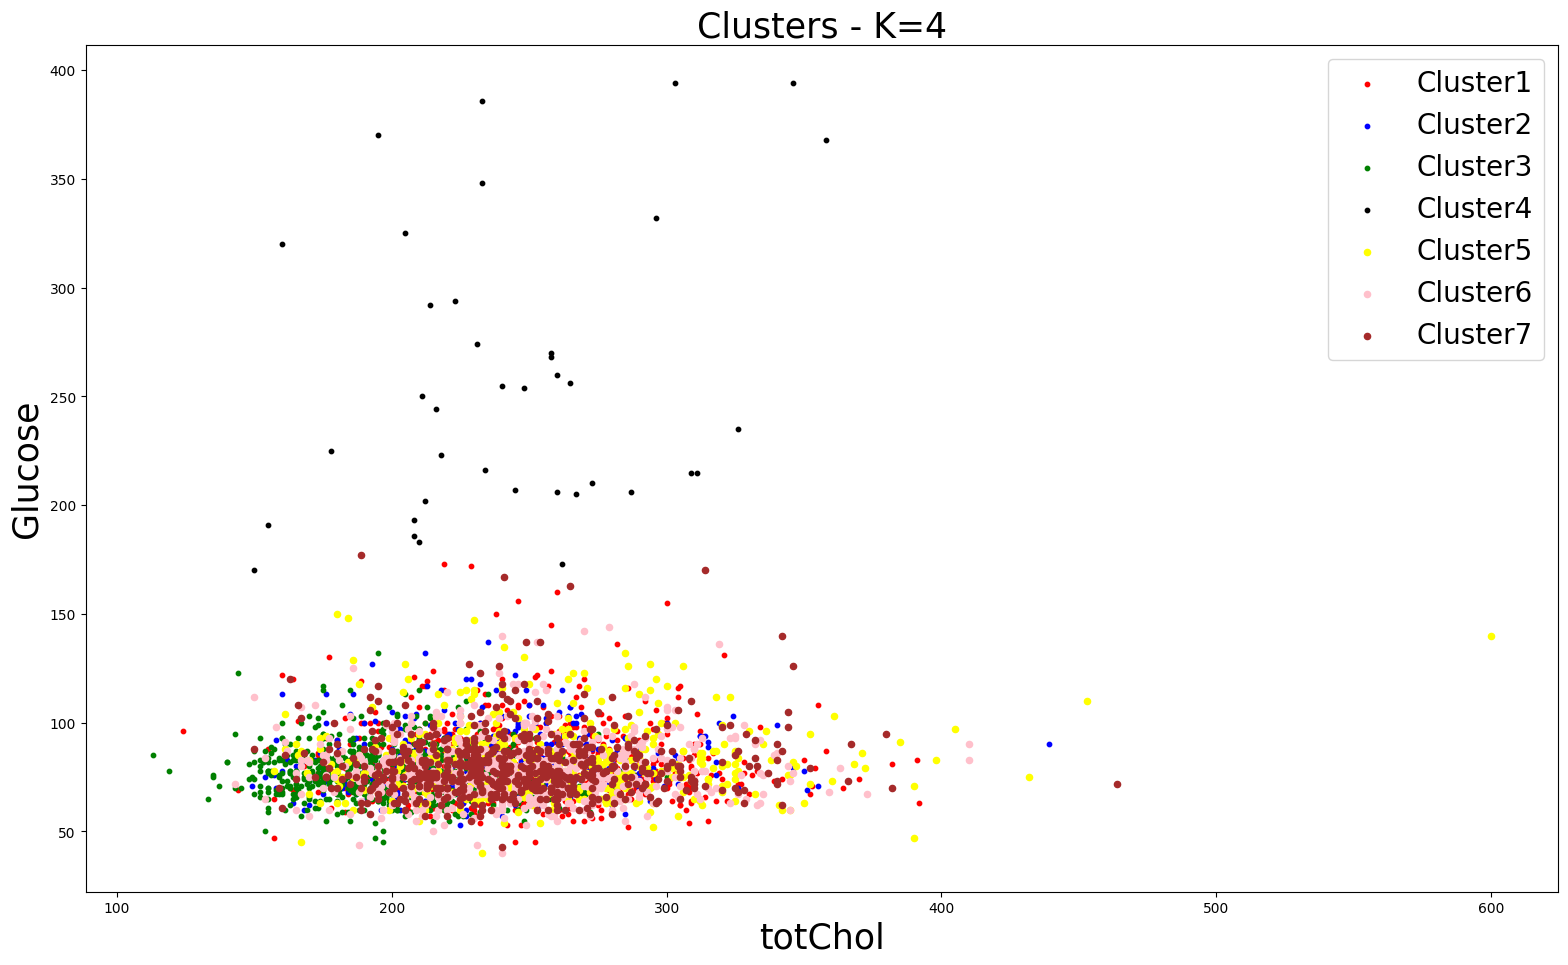

In [13]:
# If the first 2 principal components are not good for visualising the clusters, one alternative
# is to check the clusters in pair of variables. For instance,

fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(df.loc[y_kmeans == 0, "totChol"], df.loc[y_kmeans == 0, "glucose"], s=10, c="red", label = "Cluster1");
plt.scatter(df.loc[y_kmeans == 1, "totChol"], df.loc[y_kmeans == 1, "glucose"], s=10, c="blue", label = "Cluster2");
plt.scatter(df.loc[y_kmeans == 2, "totChol"], df.loc[y_kmeans == 2, "glucose"], s=10, c="green", label = "Cluster3");
plt.scatter(df.loc[y_kmeans == 3, "totChol"], df.loc[y_kmeans == 3, "glucose"], s=10, c="black", label = "Cluster4");
plt.scatter(df.loc[y_kmeans == 4, "totChol"], df.loc[y_kmeans == 4, "glucose"], s=20, c="yellow", label = "Cluster5");
plt.scatter(df.loc[y_kmeans == 5, "totChol"], df.loc[y_kmeans == 5, "glucose"], s=20, c="pink", label = "Cluster6");
plt.scatter(df.loc[y_kmeans == 6, "totChol"], df.loc[y_kmeans == 6, "glucose"], s=20, c="brown", label = "Cluster7");
plt.xlabel("totChol", fontsize = 25);
plt.ylabel("Glucose", fontsize = 25);
ax.set_title("Clusters - K=4", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

# Another alternative would be to plot the first 2 canonical variables, which is another
# transformation of variables.

## Question 2

### Question 2 (a)

In [14]:
# Oversampling
df_minority = df[(df['TenYearCHD']==1)];
df_majority = df[(df['TenYearCHD']==0)];

response_count = df.groupby("TenYearCHD")["TenYearCHD"].count();

df_minority_upsampled = resample(df_minority,
                                 replace=True,                 # sample with replacement
                                 n_samples= response_count[0], # to match majority class
                                 random_state=123);            # reproducible results
df_minority_upsampled.reset_index(drop=True, inplace=True);    # reseting row numbers

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority]);
df_upsampled.reset_index(drop=True, inplace=True) # removing row names
response_count = df_upsampled.groupby("TenYearCHD")["TenYearCHD"].count();
print("Upsampled data set: ", response_count);

Upsampled data set:  TenYearCHD
0    3099
1    3099
Name: TenYearCHD, dtype: int64


### Question 2 (b)

In [15]:
X_upsampled = df_upsampled.drop(["male","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes","TenYearCHD"], axis = 1); # continuous variables;
scaler = StandardScaler(); # creating object
fitted = scaler.fit(X_upsampled);
X_upsampled_std  = pd.DataFrame(fitted.transform(X_upsampled));

kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42);
y_kmeans = kmeans.fit_predict(X_upsampled_std);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Question 2 (c)

Variability explained by first 2 PCs:  0.4


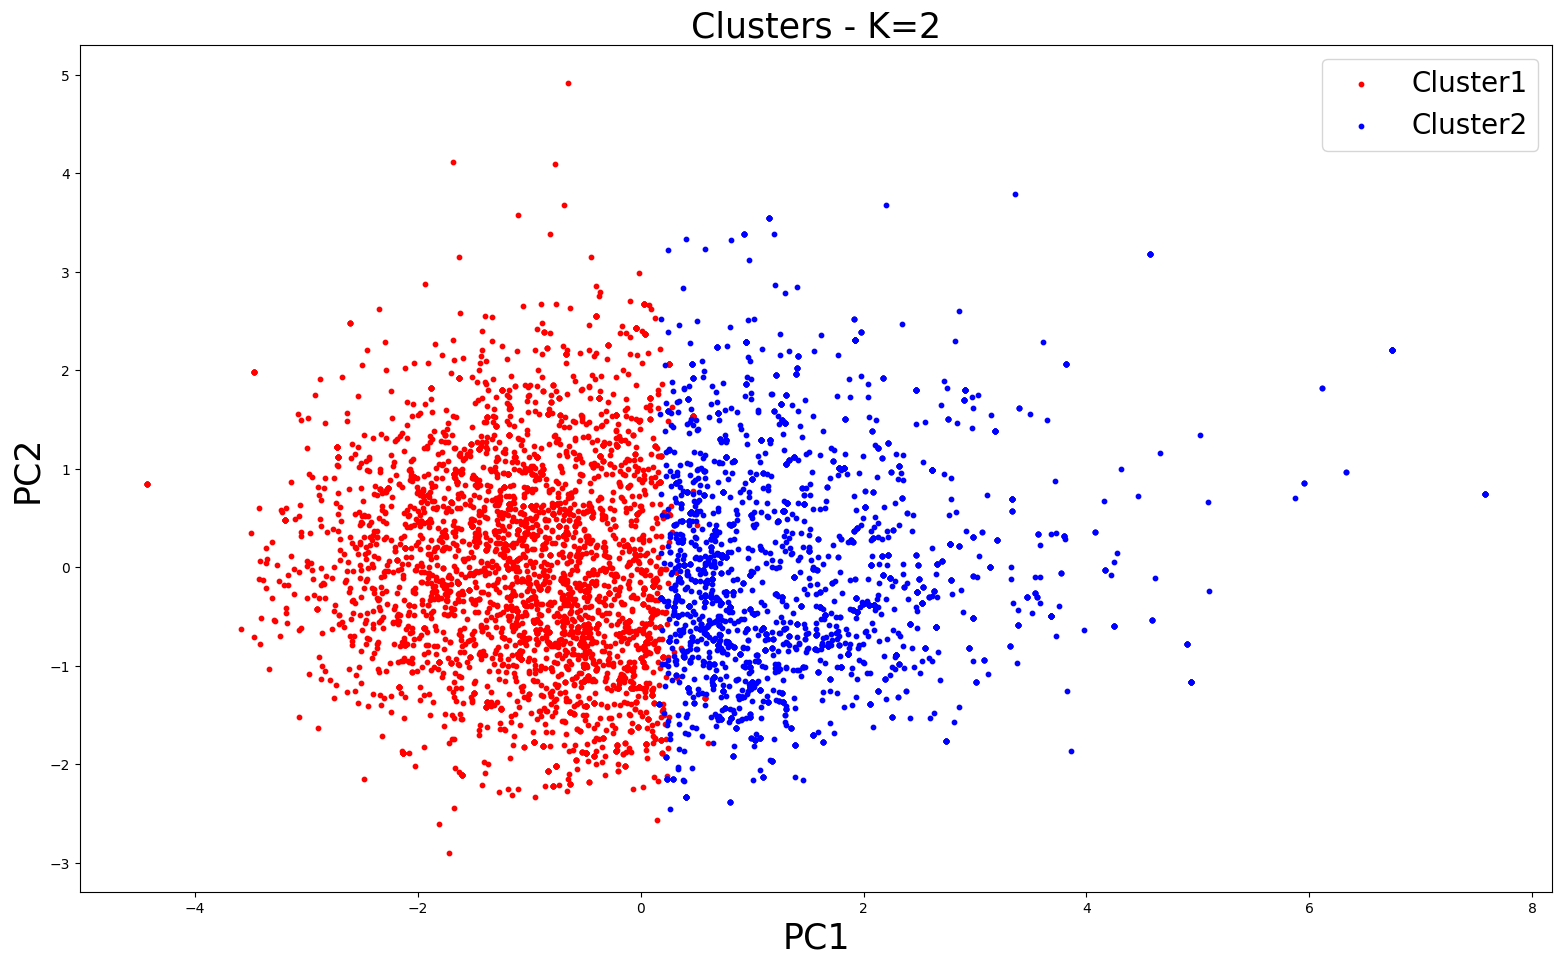

In [16]:
pca = PCA(n_components=2);
principalComponents = pca.fit_transform(X_upsampled_std);
print("Variability explained by first 2 PCs: ", round(np.sum(pca.explained_variance_ratio_),2))
PCs = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"]);

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax  = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_kmeans == 0, 0], PCs.iloc[y_kmeans == 0, 1], s=10, c="red", label = "Cluster1");
plt.scatter(PCs.iloc[y_kmeans == 1, 0], PCs.iloc[y_kmeans == 1, 1], s=10, c="blue", label = "Cluster2");
plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title("Clusters - K=2", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

# Even though the first 2 PCs explains only 35% of the variability, the scatter plot with
# the first 2 PCs shows a clear difference between the clusters.  It seems that the overlap
# happens only where the clusters meet.

### Question 2 (d)

In [17]:
# We will identify the cluster with more TenYearCHD=1

y_kmeans = pd.DataFrame(y_kmeans, columns= ["y_kmeans"]); # transforming it into a data frame

DF = pd.concat([df_upsampled, y_kmeans], axis = 1);

print("Proportion of 0s and 1s","\n", DF.groupby("y_kmeans")["TenYearCHD"].mean()); # Calculating proportion of 1s.

# Cluster 1 (shown as 0) contains 39% of TenYearCHD=1, whereas cluster 2 (shown as 1)
# contains 65% of those.

# We will define cluster 2 (shown as 1) as TenYearCHD=1 for prediction purposes and evaluate
# how the cluster method works at predicting TenYearCHD=1.

# So, we will change the labels of y_kmeans as

y_kmeans_1 = np.where(y_kmeans == 1, 1, 0)
print(DF)

Proportion of 0s and 1s 
 y_kmeans
0    0.394903
1    0.650451
Name: TenYearCHD, dtype: float64
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        0   47        3.0              0         0.0     0.0   
1        1   62        1.0              0         0.0     0.0   
2        0   57        1.0              1        43.0     0.0   
3        1   48        4.0              1        20.0     0.0   
4        1   51        1.0              1        20.0     0.0   
...    ...  ...        ...            ...         ...     ...   
6193     1   43        4.0              1        20.0     0.0   
6194     0   50        1.0              0         0.0     0.0   
6195     1   58        3.0              0         0.0     0.0   
6196     1   51        3.0              1        43.0     0.0   
6197     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         

### Question 2 (e)

In [18]:
cm = confusion_matrix( df_upsampled["TenYearCHD"], y_kmeans_1)
print("Confusion matrix: ", cm);
# The diagonal elements of the confusion matrix indicate correct predictions,
# while the off-diagonals represent incorrect predictions.

# The K-means correctly predicts the 10 year risk of coronary heart disease 62.4% of the times
print("Acuraccy: ", round(np.sum(np.diagonal(cm))/np.sum(cm),3));

# The K-means correctly predicts 53.5% of the times those with a 10 year risk of coronary heart disease
print("Sensitivity: ", round(cm[1,1]/np.sum(cm[1,:]),3));

# The K-means correctly predicts 71.2% of the times those without a 10 year risk of coronary heart disease
print("Specificity: ", round(cm[0,0]/np.sum(cm[0,:]),3));

# We can also get those values as follows
print(classification_report(df_upsampled["TenYearCHD"],
                            y_kmeans_1,
                            digits = 3))

# In general, this model predicts correctly 62.4% of the times if the patient is or not
# at a 10 year risk of coronary heart disease.

# This model is not better than flipping a coin predicting those who are at a 10 year risk
# of coronary heart disease.

# This model is a bit better predicting those who are not at a 10 year risk
# of coronary heart disease.

# Predicting those with a 10 year risk of coronary heart disease can be critical in medicine.
# However, this model is not good at that.

# This analysis was made out of curiosity, to see if an unsupervised approach could be used in
# this context.


Confusion matrix:  [[2208  891]
 [1441 1658]]
Acuraccy:  0.624
Sensitivity:  0.535
Specificity:  0.712
              precision    recall  f1-score   support

           0      0.605     0.712     0.654      3099
           1      0.650     0.535     0.587      3099

    accuracy                          0.624      6198
   macro avg      0.628     0.624     0.621      6198
weighted avg      0.628     0.624     0.621      6198



## Appendix

9
Variability explained by first 2 PCs:  1.0
Cumulative variability explained by first 2 PCs:  [0.27251395 0.40172264 0.51552979 0.62716517 0.73452592 0.82762054
 0.91377731 0.97945945 1.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


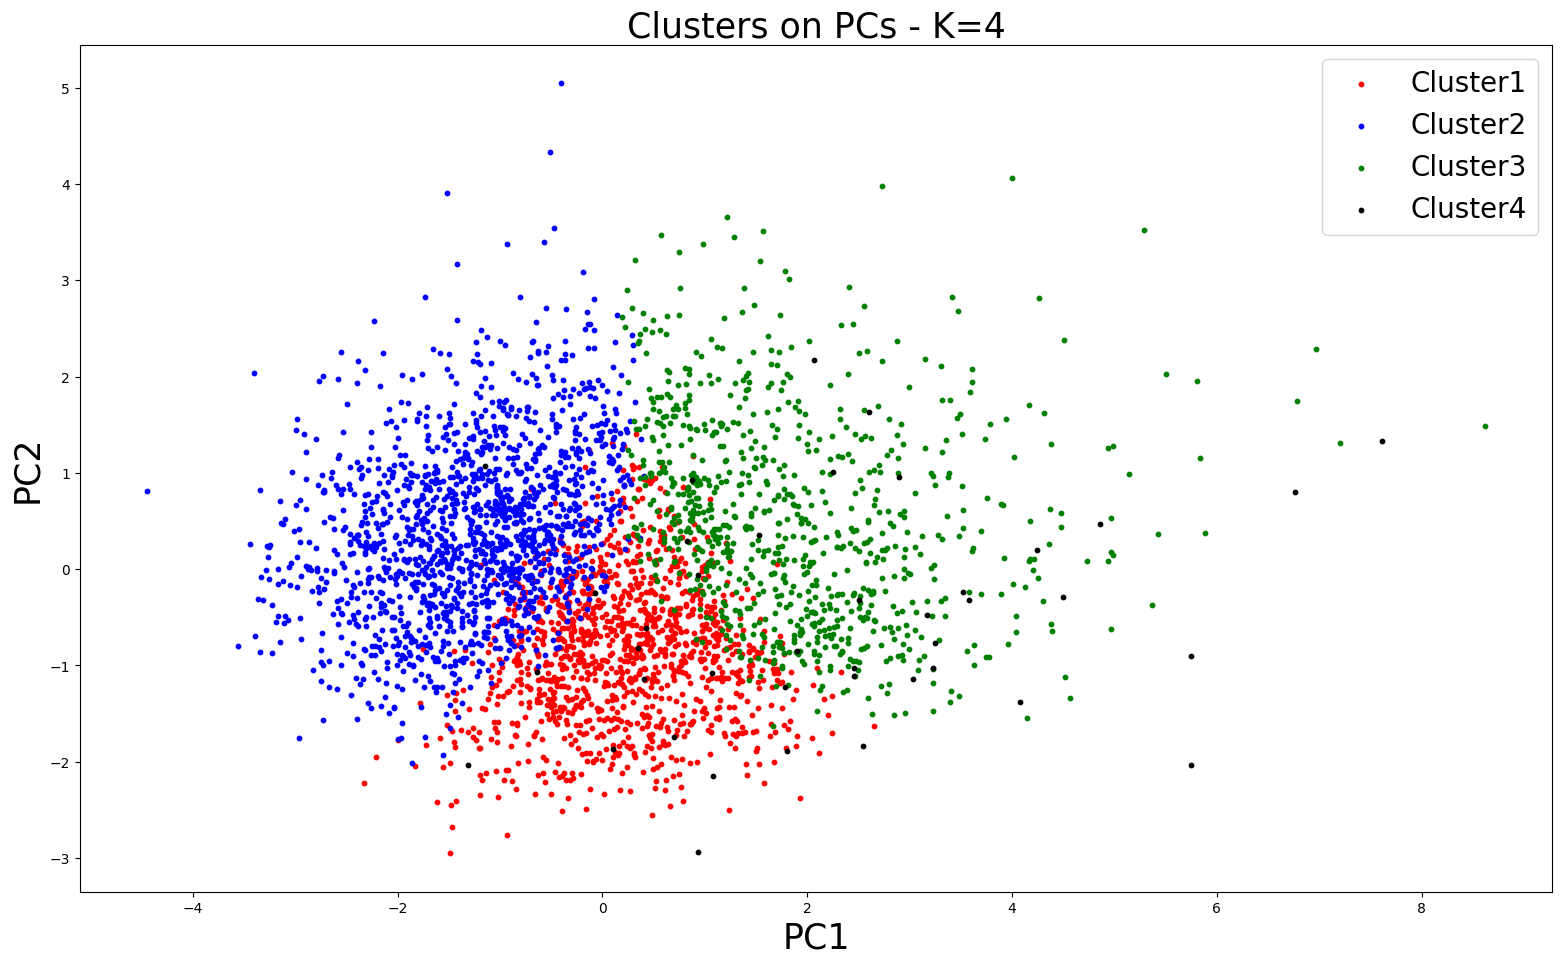

In [21]:
# We can also perform a K-means analysis on the principal components as follows:
print(X_std.shape[1])
pca = PCA(n_components=X_std.shape[1]);
principalComponents = pca.fit_transform(X_std);
print("Variability explained by first 2 PCs: ", round(np.sum(pca.explained_variance_ratio_),2))
PCs = pd.DataFrame(data = principalComponents, columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9"]);

kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42);

print("Cumulative variability explained by first 2 PCs: ", np.cumsum(pca.explained_variance_ratio_))

# We choose the first 9 principal components, which explain 93% of the variability.

y_kmeans = kmeans.fit_predict(PCs[["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9"]]);

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_kmeans == 0, 0], PCs.iloc[y_kmeans == 0, 1], s=10, c="red", label = "Cluster1");
plt.scatter(PCs.iloc[y_kmeans == 1, 0], PCs.iloc[y_kmeans == 1, 1], s=10, c="blue", label = "Cluster2");
plt.scatter(PCs.iloc[y_kmeans == 2, 0], PCs.iloc[y_kmeans == 2, 1], s=10, c="green", label = "Cluster3");
plt.scatter(PCs.iloc[y_kmeans == 3, 0], PCs.iloc[y_kmeans == 3, 1], s=10, c="black", label = "Cluster4");
plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title("Clusters on PCs - K=4", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();
